In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
date_start = '2001-09-07'
date_end = '2019-12-31'

In [88]:
snow_stn = pd.read_csv("data/OR_DB.csv",index_col=0,
                       dtype={'huc2':object,'huc4':object,'huc6':object,'huc8':object,'huc10':object,'huc12':object})

In [89]:
snow_stn.head()

,code,longitude,latitude,name,elevation_m,geometry,huc12,huc10,huc8,huc6,huc4,huc2,dem_elev,slope,aspect,pr
0,302_OR_SNTL,-117.192581,45.213280,Aneroid Lake #2,2255.520020,POINT (-117.1925811767578 45.21327972412109),170601050101,1706010501,17060105,170601,1706,17,2256,89.991560,263.659820,3.310440
1,1000_OR_SNTL,-122.165176,42.870071,Annie Springs,1831.848022,POINT (-122.1651763916016 42.87007141113281),180102030101,1801020301,18010203,180102,1801,18,1835,89.995480,186.788970,6.601648
2,304_OR_SNTL,-119.253922,45.190849,Arbuckle Mtn,1758.696045,POINT (-119.2539215087891 45.19084930419922),170702020604,1707020206,17070202,170702,1707,17,1770,89.975845,18.434948,1.412088
3,1166_OR_SNTL,-122.093803,44.325298,Bear Grass,1438.656006,POINT (-122.0938034057617 44.32529830932617),170900040203,1709000402,17090004,170900,1709,17,1444,89.996216,103.760790,6.565934
4,324_ID_SNTL,-116.980972,44.605331,Bear Saddle,1883.663940,POINT (-116.9809722900391 44.60533142089844),170501241001,1705012410,17050124,170501,1705,17,1882,89.995110,189.582950,3.395604


In [90]:
swe = pd.read_csv("data/SNOTEL.csv")
swe=swe.rename(columns={"Unnamed: 0":"datetime"})
swe['datetime'] = pd.to_datetime(swe['datetime'])
swe=swe.set_index(swe.datetime)
swe.head()

,datetime,398_OR_SNTL,687_OR_SNTL,398_OR_SNTL_daymet,687_OR_SNTL_daymet,398_OR_SNTL_daymetPR,687_OR_SNTL_daymetPR
datetime,,,,,,,
2001-09-07,2001-09-07,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-08,2001-09-08,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-09,2001-09-09,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-10,2001-09-10,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-11,2001-09-11,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# set the station of interest
insnotel = '687_OR_SNTL'
indaymet = '687_OR_SNTL_daymet'

In [92]:
swe['dif']=swe[indaymet]-swe[insnotel]
swe.head()

,datetime,398_OR_SNTL,687_OR_SNTL,398_OR_SNTL_daymet,687_OR_SNTL_daymet,398_OR_SNTL_daymetPR,687_OR_SNTL_daymetPR,dif
datetime,,,,,,,,
2001-09-07,2001-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-08,2001-09-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-09,2001-09-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-10,2001-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-11,2001-09-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/conda/envs/whw/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


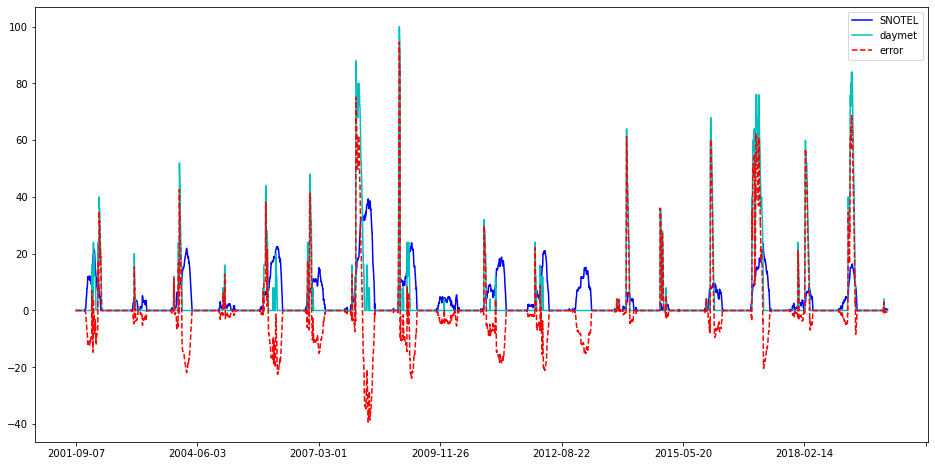

In [34]:
fig, ax = plt.subplots(figsize=[16,8]) 
swe[insnotel].plot(color ='b',ax=ax, label = 'SNOTEL')
swe[indaymet].plot(color ='c',ax=ax,label = 'daymet')
swe['dif'].plot(color ='r',linestyle = '--',ax=ax, label = 'error')
ax.legend()

<AxesSubplot:>

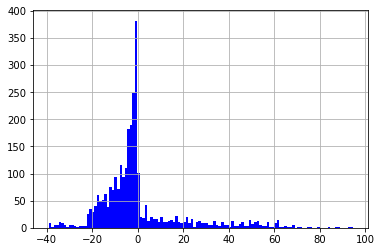

In [35]:
dif = swe['dif'][swe['dif']!=0]
dif.hist(bins=120, color = 'b')

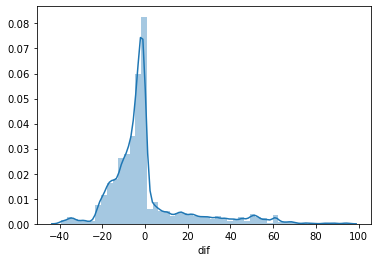

In [36]:
import seaborn as sns
ax = sns.distplot(dif)

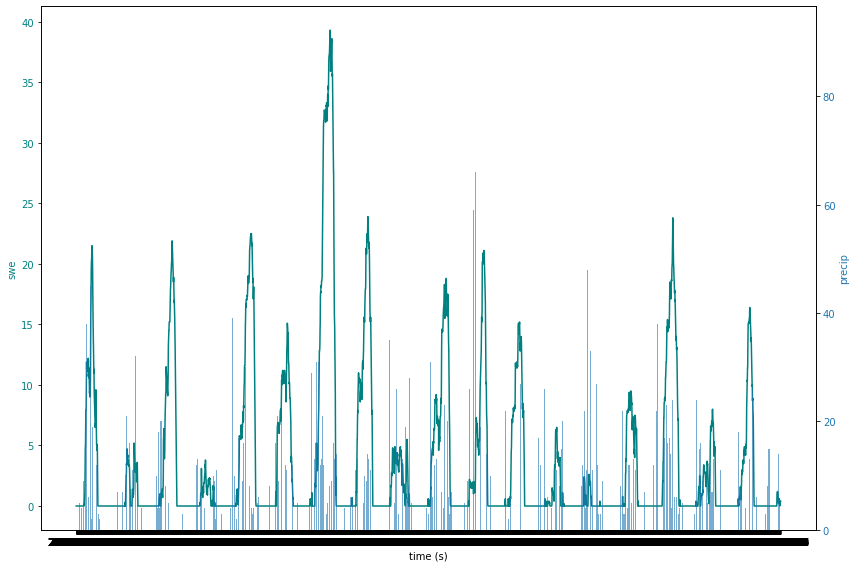

In [71]:
fig, ax1 = plt.subplots(figsize=[12,8])

color = 'teal'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('swe', color=color)
ax1.plot(swe['datetime'], swe['687_OR_SNTL'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('precip', color=color)  # we already handled the x-label with ax1
ax2.bar(swe['datetime'],swe['687_OR_SNTL_daymetPR'], color=color,alpha = .6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

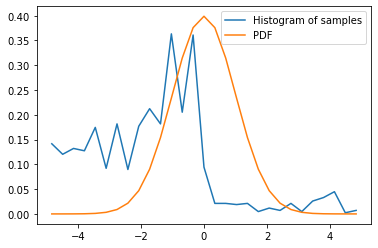

In [37]:
# Sample from a normal distribution using numpy's random number generator
samples = dif

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

In [93]:
gw = pd.read_csv("data/ORgw.csv")
gw['datetime'] = pd.to_datetime(gw['datetime'])
gw=gw.set_index(gw.datetime)
gw.rename(columns={'116034_72019_00003': 'gw'}, inplace=True)
gw.head()

,agency_cd,site_no,datetime,gw,116034_72019_00003_cd
datetime,,,,,
2001-09-07,USGS,452033122195901,2001-09-07,63.97,A
2001-09-08,USGS,452033122195901,2001-09-08,63.84,A
2001-09-09,USGS,452033122195901,2001-09-09,63.70,A
2001-09-10,USGS,452033122195901,2001-09-10,63.85,A
2001-09-11,USGS,452033122195901,2001-09-11,63.95,A


In [94]:
B_unique_sorted, B_idx = np.unique(gw.datetime, return_index=True)
B_in_A_bool = np.in1d(B_unique_sorted,swe.datetime , assume_unique=True)
gw=gw[B_in_A_bool]

In [95]:
B_unique_sorted, B_idx = np.unique(swe.datetime, return_index=True)
B_in_A_bool = np.in1d(B_unique_sorted,gw.datetime , assume_unique=True)
swe=swe[B_in_A_bool]

In [96]:
gw['depth']= 200-gw.gw
gw.head()

,agency_cd,site_no,datetime,gw,116034_72019_00003_cd,depth
datetime,,,,,,
2001-09-07,USGS,452033122195901,2001-09-07,63.97,A,136.03
2001-09-08,USGS,452033122195901,2001-09-08,63.84,A,136.16
2001-09-09,USGS,452033122195901,2001-09-09,63.70,A,136.30
2001-09-10,USGS,452033122195901,2001-09-10,63.85,A,136.15
2001-09-11,USGS,452033122195901,2001-09-11,63.95,A,136.05


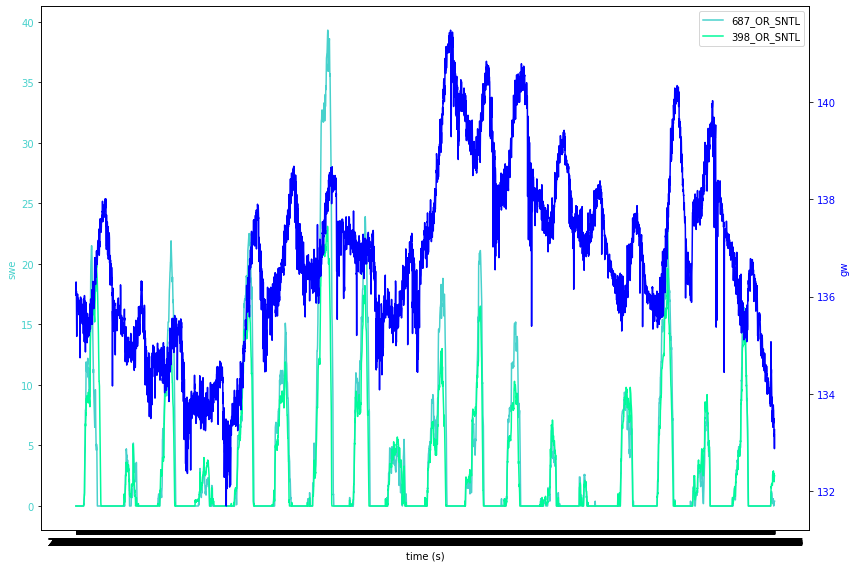

In [77]:
fig, ax1 = plt.subplots(figsize=[12,8])

color='mediumturquoise'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('swe', color=color)
ax1.plot(swe['datetime'], swe['687_OR_SNTL'], color=color, label = '687_OR_SNTL')
ax1.plot(swe['datetime'], swe['398_OR_SNTL'], color='mediumspringgreen', label = '398_OR_SNTL')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color='b'
ax2.set_ylabel('gw', color=color)  # we already handled the x-label with ax1
ax2.plot(gw['datetime'],gw['depth'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [97]:
# Group the data by month
swe_m = swe.resample('M').mean()
swe_m.head()

,398_OR_SNTL,687_OR_SNTL,398_OR_SNTL_daymet,687_OR_SNTL_daymet,398_OR_SNTL_daymetPR,687_OR_SNTL_daymetPR,dif
datetime,,,,,,,
2001-09-30,0.000000,0.000000,0.000000,0.000000,0.791667,0.958333,0.000000
2001-10-31,0.000000,0.000000,0.000000,0.000000,5.032258,5.258065,0.000000
2001-11-30,0.323333,0.326667,0.000000,0.000000,8.100000,11.200000,-0.326667
2001-12-31,7.612903,9.790323,0.000000,0.000000,9.645161,12.225806,-9.790323
2002-01-31,10.645161,12.790323,5.032258,6.580645,9.225806,13.290323,-6.209677


In [98]:
# Group the data by month
gw_m = gw.resample('M').mean()
gw_m.head()

,site_no,gw,depth
datetime,,,
2001-09-30,4.520331e+14,64.101250,135.898750
2001-10-31,4.520331e+14,64.264516,135.735484
2001-11-30,4.520331e+14,64.407667,135.592333
2001-12-31,4.520331e+14,64.552903,135.447097
2002-01-31,4.520331e+14,64.521613,135.478387
